In [123]:
import matplotlib
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
import scipy.stats
import scipy.optimize
# Para manejar los archivos y automatizar la lectura en directorios
import csv
import os
# Fontsize
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

%matplotlib inline

# Nombres de archivo, paths y definiciones

In [2]:
# SOME DEFINITIONS
# Level of the simulation ('_' for filename format)
lvl = 'Level 4/level4_'
# number of halos
nhalos = 30 

'''# level of the simulation
lvl = 'Level 3/level3_'
# number of halos
nhalos = 6''' 

# FOLDER CONTAINING ALL FILES
folder = '../Data/Halo_General/'

# FILENAMES
# Contains parameters of the disk (MHD)
fn_params = lvl+'params'+'.csv'
# Triaxial eigensystem different radii (MHD & DM) using volumetric (mean) density: Allgood et al.
fn_axes = lvl+'axes'+'.csv' # Axes = axial ratios (sqrt of eigenvals)
fn_vecs = lvl+'vecs'+'.csv' # Vecs = principal axes directions

# Definicion de funciones

In [3]:
# Reads file in "path/filename"
# Returns data as a numpy array
# Returns filenames as a list of strings
# Returns headers as an array of strings

def read_csv(filename,skip_header=1):

    # Removes quotations from file (little writing error) 
    os.system('sed -i \'s/"//g\' '+filename) 
    
    # FILENAMES!
    headers = []
    with open( filename , 'r') as myfile:
        rd = csv.reader(myfile)
        headers = next(rd) # gets only first line 
    
    data = np.genfromtxt(filename, delimiter = ',', skip_header=skip_header, dtype=float )
    
    return headers,data


# Obteniendo los datos

In [6]:
# Obtiene el contenido del archivo de semiejes
headers,axes = read_csv(folder+fn_axes)
print(headers)
# Obtiene el contenido del archivo de vctores propios asociados
headers,vecs = read_csv(folder+fn_vecs)

['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']


### Formato de archivo
\n
<font size=3>
En el archivo de semiejes, la primera letra es el semieje correspondiente $a>b>c$
Los caracteres consecutivos indican el radio en el que fue caracterizada la forma:
</font>

*  $12 \equiv 12.5\%\ R_{vir}$ 
*  $25 \equiv 25\%\ R_{vir}$ 
*  $50 \equiv 50\%\ R_{vir}$ 
*  $Disk \equiv Sampleado\ en\ el\ disco\ estelar$ 

\
<font size=3>
Adicionalmente, en terminos de filas, el archivo muestra los ejes de los halos MHD y DM intercalados de la siguiente manera:
</font>

*  --------Header------------
*  ----Info Halo1 MHD----
*  ----Info Halo1  DM------
*  ----Info Halo2 MHD----
*  ----Info Halo2  DM------
*        -------------...--------------

\

<font size=3>
Para el archivo de vectores de ejes principales el formato sigue la misma logica
</font>


In [7]:
# Dado el formato del archivo explicado anteriormente
# Se obtienen los resultados en terminos de arrays

# RADII SAMPLED
rad_sampl = ['12.5%R500'
            ,'25%R500'
            ,'50%R500'
            ,'100%R500'
            ,'Stellar Disk']

# AXES
axes = np.reshape(axes,(2*nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii
axesMHD = axes[::2] #organized halo1MHD,halo1DM,halo2MHD,halo2DM....
axesDM = axes[1::2]

# indices > haloid, rad_sampled, axis id

# VECS
vecs = np.reshape(vecs,(2*nhalos,5,3,3)) # contains DM and MHD (2*nhalos) vecs (3,3) sampled at (5) radii
vecsMHD = vecs[::2]
vecsDM = vecs[1::2]

# indices > haloid, rad_sampled, axis id, vector component

# Estudio de alineamiento 
## DM at 100%Rvir Principal axis Vs Star Disk Principal axis

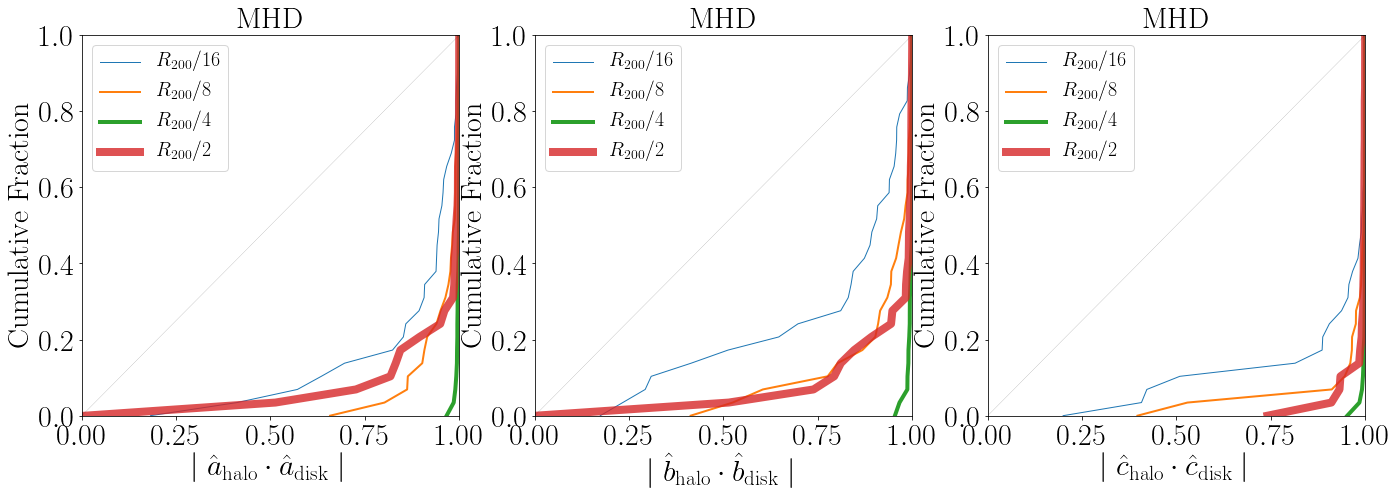

In [60]:
plt.figure(figsize=(23,7))

xlabel ={}
xlabel[0]=r'$\mid \hat{a}_{\rm halo} \cdot \hat{a}_{\rm disk}\mid$'
xlabel[1]=r'$\mid \hat{b}_{\rm halo} \cdot \hat{b}_{\rm disk}\mid$'
xlabel[2]=r'$\mid \hat{c}_{\rm halo} \cdot \hat{c}_{\rm disk}\mid$'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsMHD[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsMHD[:,3,axis_test,:]@vecs_stardisk.T))
    plt.plot(np.sort(dot_pr_8), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/16$', linewidth=1)
    plt.plot(np.sort(dot_pr_4), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/8$', linewidth=2)
    plt.plot(np.sort(dot_pr_2), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/4$', linewidth=4)
    plt.plot(np.sort(dot_pr_1), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/2$', linewidth=8, alpha=0.8)

    plt.plot([0,1],[0,1],c ='black', linewidth=0.1)
    plt.legend(fontsize=20)
    plt.title(r'MHD')
    plt.ylabel(r'Cumulative Fraction')
    plt.xlabel(xlabel[axis_test])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.linspace(0,1,5))
plt.savefig('../Document/cumulative_alignment_MHD.pdf',bbox_inches='tight')

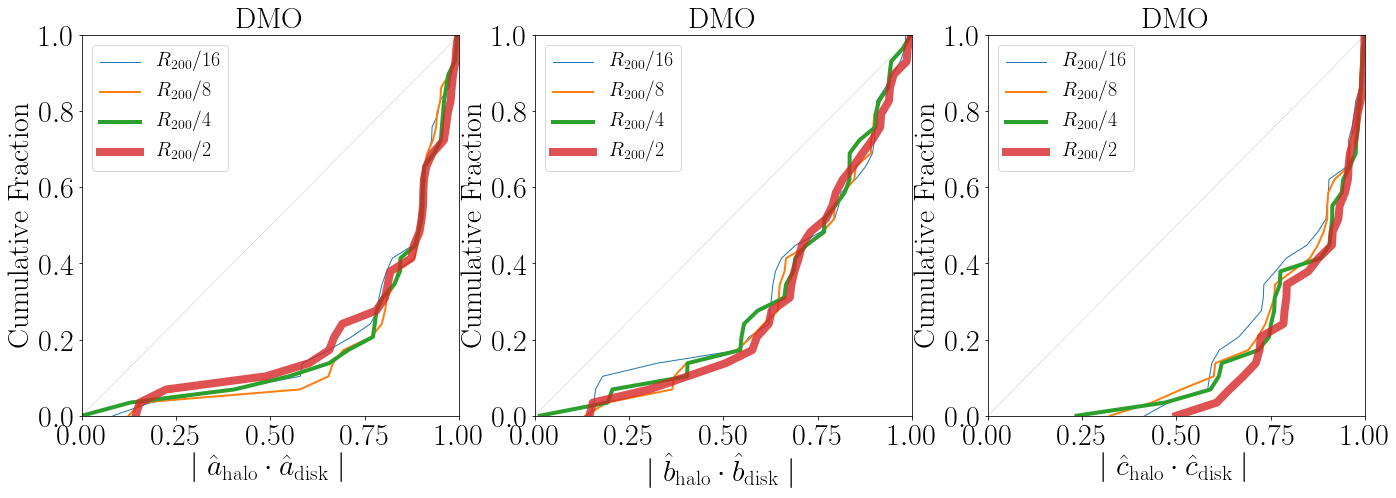

In [61]:
plt.figure(figsize=(23,7))


xlabel ={}
xlabel[0]=r'$\mid \hat{a}_{\rm halo} \cdot \hat{a}_{\rm disk}\mid$'
xlabel[1]=r'$\mid \hat{b}_{\rm halo} \cdot \hat{b}_{\rm disk}\mid$'
xlabel[2]=r'$\mid \hat{c}_{\rm halo} \cdot \hat{c}_{\rm disk}\mid$'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsDM[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsDM[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsDM[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsDM[:,3,axis_test,:]@vecs_stardisk.T))
    plt.plot(np.sort(dot_pr_8), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/16$', linewidth=1)
    plt.plot(np.sort(dot_pr_4), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/8$', linewidth=2)
    plt.plot(np.sort(dot_pr_2), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/4$', linewidth=4)
    plt.plot(np.sort(dot_pr_1), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/2$', linewidth=8, alpha=0.8)

    plt.plot([0,1],[0,1],c ='black', linewidth=0.1)
    plt.legend(fontsize=20)
    plt.title(r'DMO')
    plt.ylabel(r'Cumulative Fraction')
    plt.xlabel(xlabel[axis_test])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.linspace(0,1,5))
plt.savefig('../Document/cumulative_alignment_DM.pdf',bbox_inches='tight')


[18.95003637  9.64825981  2.23517106  7.15929094]
(4, 30)
[25.88596855 12.91758152  2.41753703  7.01630155]
(4, 30)
[7.9618111  5.41479298 1.30348085 4.35257813]
(4, 30)


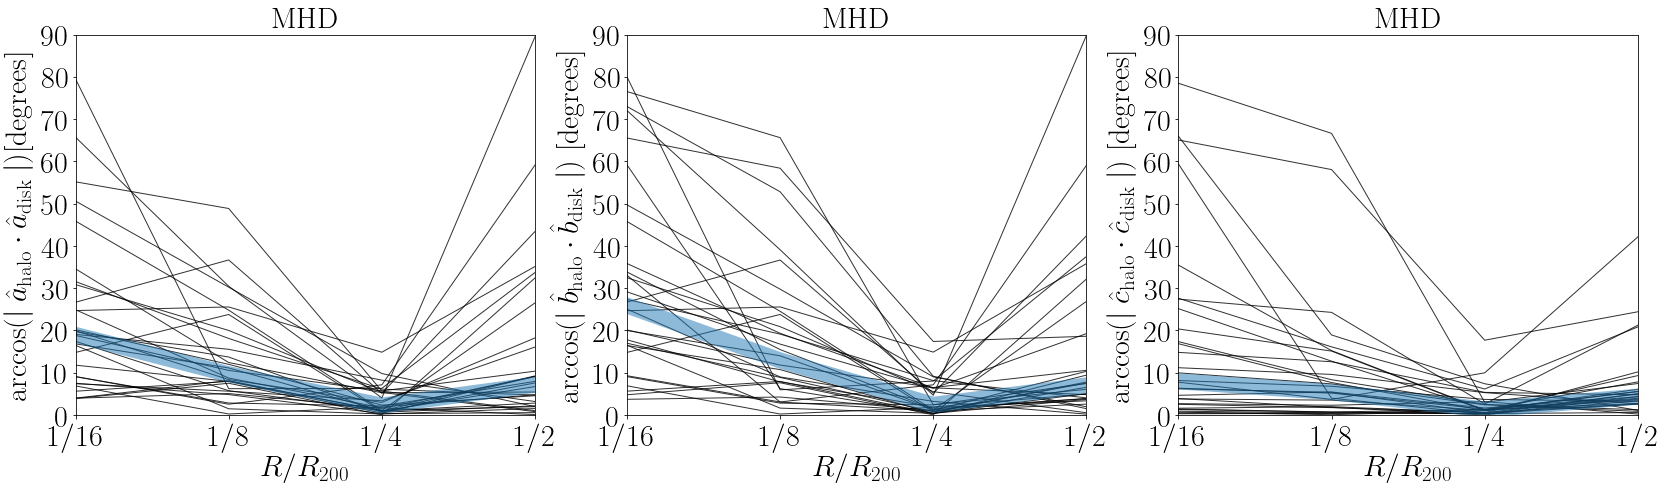

In [214]:
plt.figure(figsize=(28,7))

ylabel ={}
ylabel[0]=r'$\arccos (\mid \hat{a}_{\rm halo} \cdot \hat{a}_{\rm disk}\mid) [{\rm degrees}]$'
ylabel[1]=r'$\arccos (\mid \hat{b}_{\rm halo} \cdot \hat{b}_{\rm disk}\mid$) [{\rm degrees}]'
ylabel[2]=r'$\arccos (\mid \hat{c}_{\rm halo} \cdot \hat{c}_{\rm disk}\mid$) [{\rm degrees}]'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

angles = np.zeros((30,4))
for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsMHD[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsMHD[:,3,axis_test,:]@vecs_stardisk.T))
    angles = np.rad2deg(np.arccos(np.array([dot_pr_8, dot_pr_4, dot_pr_2, dot_pr_1])))
    median = np.median(angles, axis=1)
    print(median)
    print(np.shape(angles))
    for h in range(30):
        plt.plot(angles[:,h], color='black', alpha=0.8, linewidth=1)
    plt.plot(median, linewidth=16, alpha=0.5)
    plt.title(r'MHD')
    plt.ylabel(ylabel[axis_test])
    plt.xlabel(r'$R/R_{200}$')
    plt.xlim([0,3])
    plt.ylim([0,90])
    plt.xticks(np.linspace(0,3,4), [r"$1/16$", r"$1/8$", r"$1/4$", r"$1/2$"])
    plt.yticks(np.linspace(0,90,10))
plt.savefig('../Document/angles_alignment_MHD.pdf',bbox_inches='tight')

[26.93268212 26.22878667 26.34654807 26.15633905]
(4, 30)
[39.05174839 38.882986   39.92753403 41.2987274 ]
(4, 30)
[27.67799975 26.51990337 24.38109572 22.84290899]
(4, 30)


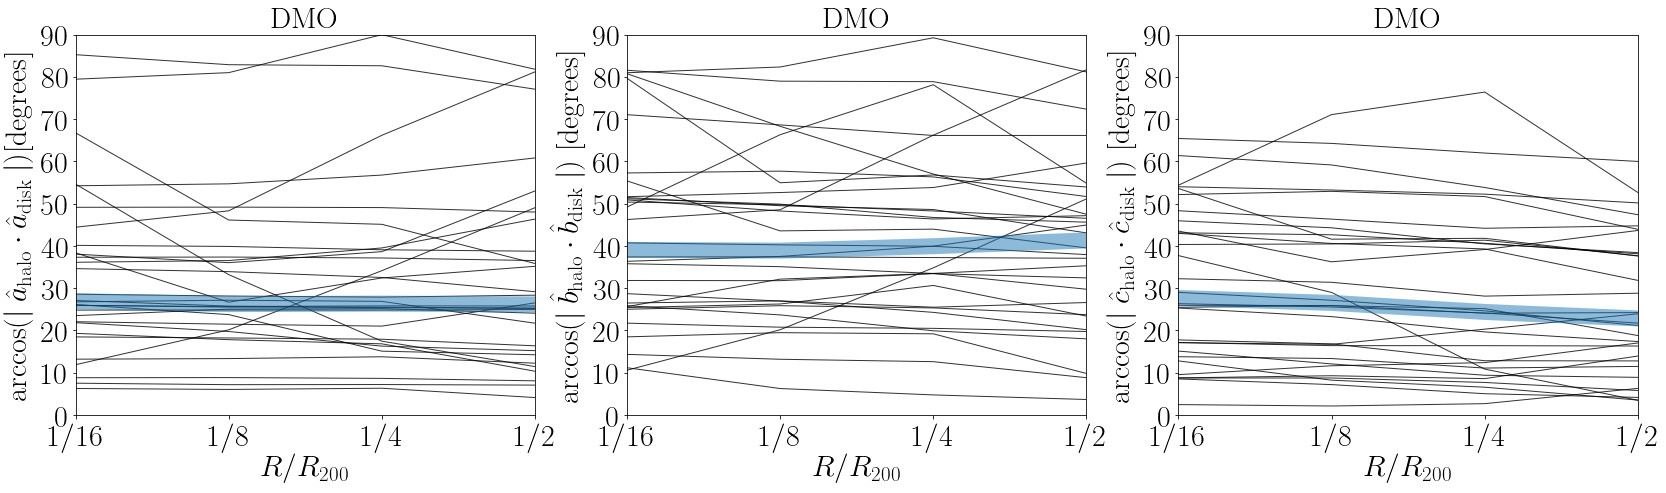

In [215]:
plt.figure(figsize=(28,7))

ylabel ={}
ylabel[0]=r'$\arccos (\mid \hat{a}_{\rm halo} \cdot \hat{a}_{\rm disk}\mid) [{\rm degrees}]$'
ylabel[1]=r'$\arccos (\mid \hat{b}_{\rm halo} \cdot \hat{b}_{\rm disk}\mid$) [{\rm degrees}]'
ylabel[2]=r'$\arccos (\mid \hat{c}_{\rm halo} \cdot \hat{c}_{\rm disk}\mid$) [{\rm degrees}]'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

angles = np.zeros((30,4))
for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsDM[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsDM[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsDM[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsDM[:,3,axis_test,:]@vecs_stardisk.T))
    angles = np.rad2deg(np.arccos(np.array([dot_pr_8, dot_pr_4, dot_pr_2, dot_pr_1])))
    median = np.median(angles, axis=1)
    print(median)
    print(np.shape(angles))
    for h in range(30):
        plt.plot(angles[:,h], color='black', alpha=0.8, linewidth=1)
    plt.plot(median, linewidth=16, alpha=0.5)
    plt.title(r'DMO')
    plt.ylabel(ylabel[axis_test])
    plt.xlabel(r'$R/R_{200}$')
    plt.xlim([0,3])
    plt.ylim([0,90])
    plt.xticks(np.linspace(0,3,4), [r"$1/16$", r"$1/8$", r"$1/4$", r"$1/2$"])
    plt.yticks(np.linspace(0,90,10))
plt.savefig('../Document/angles_alignment_DM.pdf',bbox_inches='tight')

In [108]:
disk_properties = np.loadtxt("../Data/Halo_General/Level 4/level4_disk_properties.txt")
satellite_properties = np.loadtxt("../Data/Halo_General/Level 4/level4_satellite_properties.txt")#,encoding = 'utf-8')
bfield_properties = np.loadtxt("../Data/Halo_General/Level 4/level4_bfield_properties.txt")
params = np.loadtxt("../data/Halo_General/Level 4/level4_params.txt", delimiter=',')

compiled_properties = np.ones((30,4))
main_props = dict()
main_props['rho_gas'] = bfield_properties[:,3]
main_props['D/T'] = disk_properties[:,9]
main_props['R_opt'] = disk_properties[:,10]
main_props['f_acc'] = disk_properties[:,11]

[7.9618111  5.41479298 1.30348085 4.35257813]
(4, 30)
[7.9618111  5.41479298 1.30348085 4.35257813]
(4, 30)
[7.9618111  5.41479298 1.30348085 4.35257813]
(4, 30)


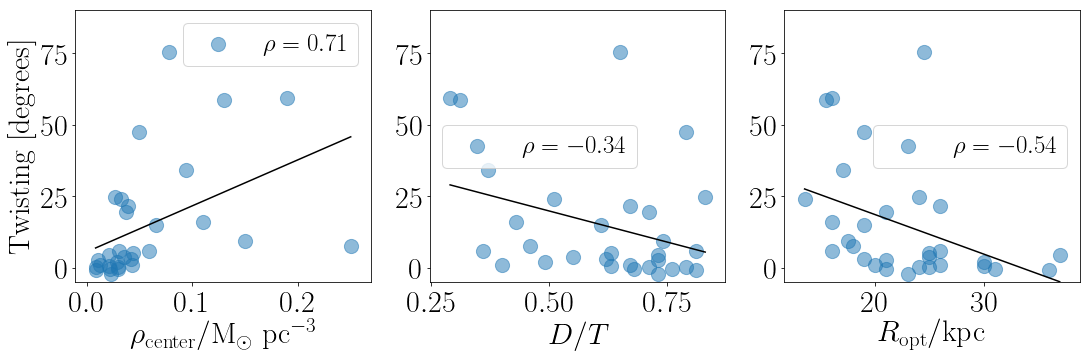

In [208]:
plt.figure(figsize=(18,5))

xlabel = dict()
xlabel[1] = r"$\rho_{\mathrm {center}}/ \mathrm{M}_{\odot}\ \mathrm{pc}^{-3}$"
xlabel[2] = "$D/T$"
xlabel[3] = "${R_{\mathrm{opt}}}/{\mathrm{kpc}}$"
xlabel[4] = "$f_{\mathrm{acc}}$"

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 30
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

for i_axis, props in enumerate(['rho_gas','D/T','R_opt']):
    plt.subplot(1,3,i_axis+1)
    axis_test = 2
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsMHD[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsMHD[:,3,axis_test,:]@vecs_stardisk.T))
    angles = np.rad2deg(np.arccos(np.array([dot_pr_8, dot_pr_4, dot_pr_2, dot_pr_1])))
    delta_angles = angles[0,:] - angles[2,:]
    median = np.median(angles, axis=1)
    
    dot_pr_8 = np.abs(np.diag(vecsDM[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsDM[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsDM[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsDM[:,3,axis_test,:]@vecs_stardisk.T))
    angles_DM = np.rad2deg(np.arccos(np.array([dot_pr_8, dot_pr_4, dot_pr_2, dot_pr_1])))
    delta_angles_DM = angles_DM[0,:] - angles_DM[2,:]
    print(median)
    print(np.shape(angles))
    r_value_spearman, p_values = scipy.stats.spearmanr(main_props[props], delta_angles)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(main_props[props], delta_angles)
    x = np.linspace(main_props[props].min(), main_props[props].max(), 20)
    y = slope*x + intercept
    plt.plot(x, y, color='black')

    plt.scatter(main_props[props], delta_angles, s=200, alpha=0.5, label=r'$\rho = {:.2f}$'.format(r_value_spearman))
    #plt.ylabel(r'$\Delta \arccos (\mid \hat{c}_{\rm halo} \cdot \hat{c}_{\rm disk}\mid) [{\rm degrees}]$')
    if i_axis==0:
        plt.ylabel(r'${\rm Twisting}\ [{\rm degrees}]$')
    plt.xlabel(xlabel[i_axis+1])
    plt.ylim([-5,90])
    plt.legend(fontsize=25)
    #plt.yticks(np.linspace(0,90,10))
plt.savefig('../Document/correlations_angles_alignment_MHD.pdf',bbox_inches='tight')

In [56]:
axis_test = 2
print(np.mean(np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))))))
print(np.std(np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))))))
print((np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))))))

2.8167152077814284
3.6180514517332205
[5.23273762e-01 3.69326708e+00 1.02135700e+00 3.01580162e+00
 1.04435465e+00 3.39553878e-01 1.54909245e-02 1.32587377e+00
 1.67140666e+00 1.03434436e+00 2.36856202e-01 1.76969024e+01
 7.39314586e+00 6.15809385e+00 9.97971112e+00 1.25227355e+00
 5.05554035e-01 3.17408872e+00 3.09925387e-01 5.92857047e-01
 2.62491697e+00 1.28108792e+00 1.38396809e+00 3.59286143e-01
 1.12737546e+00 2.40566289e+00 5.29577528e+00 5.35832643e+00
 2.51945202e+00 1.16147315e+00]


In [55]:
axis_test = 2
print(np.mean(np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))))))
print(np.std(np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))))))
print((np.rad2deg(np.arccos(np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))))))

17.596804645774807
21.687374839570438
[ 1.61083384  8.15815254  0.67746972 78.47275866 20.36115521  1.30357384
  3.90450518  1.42232037  4.66501804 16.87038177 59.40662158 65.0602537
 65.95686129 27.62167264  7.76546965  0.30541099  6.20762623  2.69701278
  0.4439366   2.54014686 27.41752797 25.16044831  6.34789502  0.90932711
  3.80324259  9.97742492 11.19161826 14.81964705 17.35673906 35.46908759]


In [138]:
from scipy.stats.mstats import gmean

# Reads file in "path/filename"
# Returns data as a numpy array
# Returns filenames as a list of strings
# Returns headers as an array of strings

def read_csv(filename,skip_header=1):

    # Removes quotations from file (little writing error) 
    os.system('sed -i \'s/"//g\' '+filename) 
    
    # FILENAMES!
    headers = []
    with open( filename , 'r') as myfile:
        rd = csv.reader(myfile)
        headers = next(rd) # gets only first line 
    
    data = np.genfromtxt(filename, delimiter = ',', skip_header=skip_header, dtype=float )
    
    return headers,data

# The virial radius R200
import pandas as pd
Rvir200 = pd.read_csv('../Data/Halo_General/RVir200.csv')
Rvir200.keys()

# Se define el nivel al cual se obtendran las graficas
#lvl = 'level3'
lvl = 'level4'

# Los niveles tienen un conjunto distinto de halos
halonums = None
if lvl == 'level3':
    halonums = [6,16,21,23,24,27]
if lvl == 'level4':
    halonums = range(1,31)

# Measurements near rvir    
axes_vir_MHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+"Semiaxes_rvir_1e2rvir.csv", delimiter = ',')[:,:3]
radsvMHD = gmean(axes_vir_MHD,axis = 1)

axes_Rvir_MHD = []
axes_Rvir_DM = []

# Recorre los halos para encontrar la diferencia entre el radio virial 
# y el radio sampleado mas cercano
for i in halonums:
    # Obtiene el nombre de la carpeta para el halo especifico
    # The difference
    print("-------------- halo "+str(i)+"---------------------")
    halo = 'halo_'+str(i)
    # Consulta los semiejes de DM y MHD
    arrDM = np.loadtxt("../Data/Halo_Detail/"+lvl+"_DM/"+halo+"/"+"abc_"+lvl+"_DM_"+halo+".txt", delimiter = ',')
    # The list of all radii sampled
    radsDM = gmean(arrDM,axis = 1)
    # The minimum difference
    argminDM = np.argmin(np.abs(radsDM-Rvir200['DM'][i-1]))
    axes_Rvir_DM.append(arrDM[argminDM])
    print('DM: ', Rvir200['DM'][i-1],radsDM[argminDM],100*abs(Rvir200['DM'][i-1]-radsDM[argminDM])/Rvir200['DM'][i-1])

    if i != 20 and i != 19:
        # Consulta los semiejes de DM y MHD
        arrMHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+halo+"/"+"abc_"+lvl+"_MHD_"+halo+".txt", delimiter = ',')
        arrMHD = np.loadtxt("../Data/Halo_Detail/"+lvl+"_MHD/"+halo+"/"+"abc_"+lvl+"_MHD_"+halo+".txt", delimiter = ',')

        # The list of all radii sampled
        radsMHD = gmean(arrMHD,axis = 1)
        # The minimum difference
        argminMHD = np.argmin(np.abs(radsMHD-Rvir200['MHD'][i-1]))
        axes_Rvir_MHD.append(arrMHD[argminMHD])
        print('MHD: ',Rvir200['MHD'][i-1],radsMHD[argminMHD],100*abs(Rvir200['MHD'][i-1]-radsMHD[argminMHD])/Rvir200['MHD'][i-1])
    else: 
        axes_Rvir_MHD.append(axes_vir_MHD[i-1])
        print('MHD: ',Rvir200['MHD'][i-1],radsvMHD[i-1],100*abs(Rvir200['MHD'][i-1]-radsvMHD[i-1])/Rvir200['MHD'][i-1])


-------------- halo 1---------------------
DM:  196.92700000000002 193.91779537311618 1.5280812823451546
MHD:  187.674 194.29879795962833 3.5299497850678967
-------------- halo 2---------------------
DM:  235.09400000000002 228.8256542667573 2.6663146372271136
MHD:  233.93400000000003 218.54863346732265 6.576797956978199
-------------- halo 3---------------------
DM:  210.69299999999998 223.67077999197497 6.159568657703382
MHD:  210.955 207.80203888126277 1.4946131254235444
-------------- halo 4---------------------
DM:  219.378 204.42155914128077 6.817657585865137
MHD:  215.438 225.89128537205852 4.852108435864857
-------------- halo 5---------------------
DM:  196.984 192.3176582992171 2.3688937684192157
MHD:  197.24599999999998 208.99668048343622 5.957373271669002
-------------- halo 6---------------------
DM:  191.84 185.36191840769996 3.376814841691015
MHD:  189.342 178.53169895475946 5.709404699031672
-------------- halo 7---------------------
DM:  197.864 197.89437121420153 0.01

In [146]:
# Dado el formato del archivo explicado anteriormente
# Se obtienen los resultados en terminos de arrays

# RADII SAMPLED
rad_sampl = ['12.5%Rvir500'
            ,'25%Rvir500'
            ,'50%Rvir500'
            ,'100%Rvir500'
            ,'100%Rvir200'
            ,'Stellar Disk']

# AXES
axes = np.reshape(axes,(2*nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii
axesMHD = axes[::2] #organized halo1MHD,halo1DM,halo2MHD,halo2DM....
axesMHD = np.insert(axesMHD,4,axes_Rvir_MHD,axis=1)
axesDM = axes[1::2]
axesDM = np.insert(axesDM,4,axes_Rvir_DM,axis=1)

# indices > haloid, rad_sampled, axis id

# VECS
vecs = np.reshape(vecs,(2*nhalos,5,3,3)) # contains DM and MHD (2*nhalos) vecs (3,3) sampled at (5) radii
vecsMHD = vecs[::2]
vecsDM = vecs[1::2]

# indices > haloid, rad_sampled, axis id, vector component
summary = np.array([axesMHD[:,:,1]/axesMHD[:,:,0], axesMHD[:,:,2]/axesMHD[:,:,0]])

axis_a = axesMHD[:,:,0]
axis_b = axesMHD[:,:,1]
axis_c = axesMHD[:,:,2]
T_MHD = (axis_a**2-axis_b**2)/(axis_a**2-axis_c**2)
ii_nan = np.isnan(T_MHD)
T_MHD[ii_nan] = 0.01

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in true_divide


0.5968854282536151
0.7348164627363738
0.43448275862068964
0.1670745272525028
-0.019134497837838306


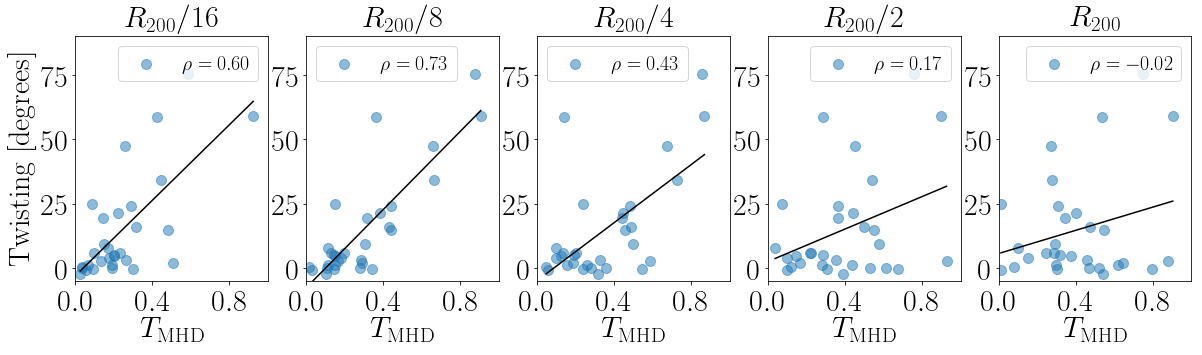

In [224]:
i_radius = 1
titles = dict()
titles[0] = r"$R_{200}/16$"
titles[1] = r"$R_{200}/8$"
titles[2] = r"$R_{200}/4$"
titles[3] = r"$R_{200}/2$"
titles[4] = r"$R_{200}$"

figure = plt.figure(figsize=(20,4.5))
for i_radius in range(5):
    plt.subplot(1,5,i_radius+1)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(T_MHD[:,i_radius], delta_angles)
    x = np.linspace(T_MHD[:,i_radius].min(), T_MHD[:,i_radius].max(), 20)
    y = slope*x + intercept
    plt.plot(x, y, color='black')
    
    r_value_spearman, p_values = scipy.stats.spearmanr(T_MHD[:,i_radius], delta_angles)
    plt.scatter(T_MHD[:,i_radius],delta_angles,label= r"$\rho = {:.2f}$".format(r_value_spearman), s=100, alpha=0.5) # 1/8 R

    
    print(r_value_spearman)
    plt.ylim([-5,90])
    plt.xlim([0,1])
    plt.xticks(np.linspace(0,0.8,3))
    plt.yticks(np.linspace(0,75,4))
    plt.xlabel(r"$T_{\rm MHD}$")
    plt.legend(fontsize=20)
    if i_radius==0:
        plt.ylabel(r'${\rm Twisting}\ [{\rm degrees}]$')
    plt.title(titles[i_radius])
plt.savefig('../Document/correlations_angles_triaxiality_MHD.pdf',bbox_inches='tight')

-0.14883203559510566 0.43249188239021186
2.875192478536992 14.780089437993379


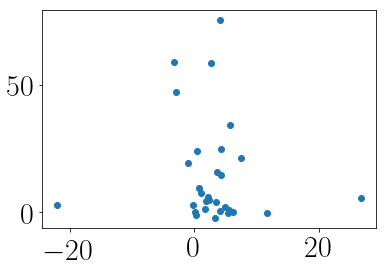

In [220]:
plt.scatter(delta_angles_DM, delta_angles)
r_value_spearman, p_values = scipy.stats.spearmanr(delta_angles_DM, delta_angles)
print(r_value_spearman, p_values)
print(np.mean(delta_angles_DM), np.mean(delta_angles))